C:\Users\Omkar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\Omkar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 102ms/step - accuracy: 0.2724 - loss: 2.1511 - val_accuracy: 0.4168 - val_loss: 1.6431
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step - accuracy: 0.4085 - loss: 1.6225 - val_accuracy: 0.4675 - val_loss: 1.4522
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.4510 - loss: 1.5096 - val_accuracy: 0.4627 - val_loss: 1.5102
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.4883 - loss: 1.4238 - val_accuracy: 0.5160 - val_loss: 1.3134
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 232s 296ms/step - accuracy: 0.5049 - loss: 1.3822 - val_accuracy: 0.4724 - val_loss: 1.5603
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.5275 - loss: 1.3223 - val_accuracy: 0.5758 - val_loss: 1.1843
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5434 - loss: 1.2849 - val_accuracy: 0.6157 - val_loss: 1.0835
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step - accuracy: 0.5627 - loss: 1.2377 - va

Test accuracy: 0.7388


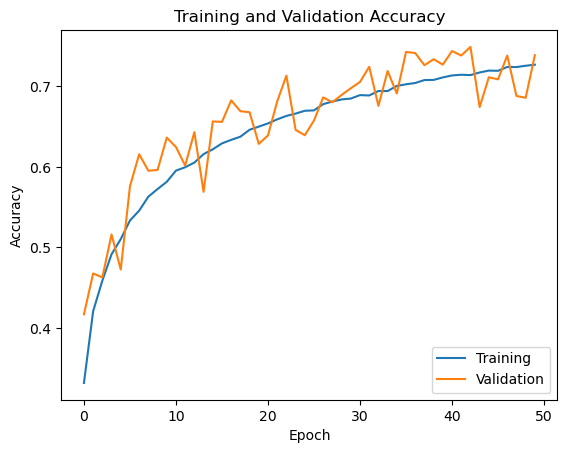

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Confusion Matrix:
 [[876  56  12   2   4   0   1  11  18  20]
 [  9 960   1   0   0   1   1   2   1  25]
 [116  19 650  13  36  34  79  35   6  12]
 [ 64  41  82 437  45 105 124  55  21  26]
 [ 54  11 107  14 603   8  97 102   4   0]
 [ 28  15  76  88  31 624  44  83   4   7]
 [ 16  18  45  11   8   3 882   3   9   5]
 [ 28  17  39   4  23  29   9 841   2   8]
 [144  98   5   2   1   2   5   5 704  34]
 [ 36 129   4   1   2   2   3   7   5 811]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74      1000
           1       0.70      0.96      0.81      1000
           2       0.64      0.65      0.64      1000
           3       0.76      0.44      0.56      1000
           4       0.80      0.60      0.69      1000
           5       0.77      0.62      0.69      1000
           6       0.71      0.88      0.79      1000
           7       0.74      0.84      0.78      1

In [9]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import numpy as np
from utils.plot_metrics import plot_metrics
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load and normalize CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)
datagen.fit(train_images)

# Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compile the Model with SGD Optimizer
optimizer = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the Model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50, validation_data=(test_images, test_labels))

# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Save the Model
model.save('models/cnn_cifar10_model.h5')
model.save('models/cnn_cifar10_model.keras')

# Plot Training and Validation Accuracy
plot_metrics(history, 'accuracy', 'val_accuracy')

# Predict labels for test set
predictions = np.argmax(model.predict(test_images), axis=1)
true_labels = np.squeeze(test_labels)  # Removes single-dimensional entries 

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(true_labels, predictions))


In [11]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")


313/313 - 6s - 18ms/step - accuracy: 0.7388 - loss: 0.7671
Final Test Loss: 0.7671
Final Test Accuracy: 0.7388
